In [55]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version=1, as_frame=False) # fetch data
mnist.target = mnist.target.astype(np.uint8)
from sklearn.model_selection import train_test_split

X = mnist["data"]
y = mnist["target"]

In [16]:
X_train =X[:60000]
y_train =y[:60000]
X_test = X[10000:]
y_test = y[10000:]

In [17]:
from sklearn.ensemble import RandomForestClassifier

In [27]:
rnd_clf = RandomForestClassifier(n_estimators=100, random_state=42)

In [28]:
# see how long it takes
import time
start_time = time.time()
rnd_clf.fit(X_train, y_train)
finished_time = time.time()

In [29]:
finished_time - start_time

36.589109659194946

In [30]:
# use pca to reduce the explained_variance_error to 95%
from sklearn.decomposition import PCA
pca = PCA(n_components=0.95)
X_reduced = pca.fit_transform(X_train)

In [31]:
rnd_clf2 = RandomForestClassifier(n_estimators=100, random_state=42)
pca_start = time.time()
rnd_clf2.fit(X_reduced, y_train)
pca_finished = time.time()

In [32]:
pca_finished - pca_start
# the training is slower than the original datasets

79.77018356323242

In [33]:
# evaluate on the test set
from sklearn.metrics import accuracy_score
# the original data
y_pred = rnd_clf.predict(X_test)
print(accuracy_score(y_pred, y_test))

0.9950833333333333


In [35]:
X_test_reduced = pca.transform(X_test)
y_pred = rnd_clf2.predict(X_test_reduced)
print(accuracy_score(y_pred, y_test))
#pca really did not help in this case

0.99135


In [56]:
# just use 10000 random image is much faster
import numpy as np
np.random.seed(42)

m = 10000
idx = np.random.permutation(60000)[:m]

X = mnist['data'][idx]
y = mnist['target'][idx]

In [57]:
# reduce down to 2 dimensions
# practice for visualization
from sklearn.manifold import TSNE
tsne = TSNE(n_components = 2, random_state=42)
X_reduced=tsne.fit_transform(X)

In [58]:
# use matlibplot for ploting
from matplotlib import pyplot as plt

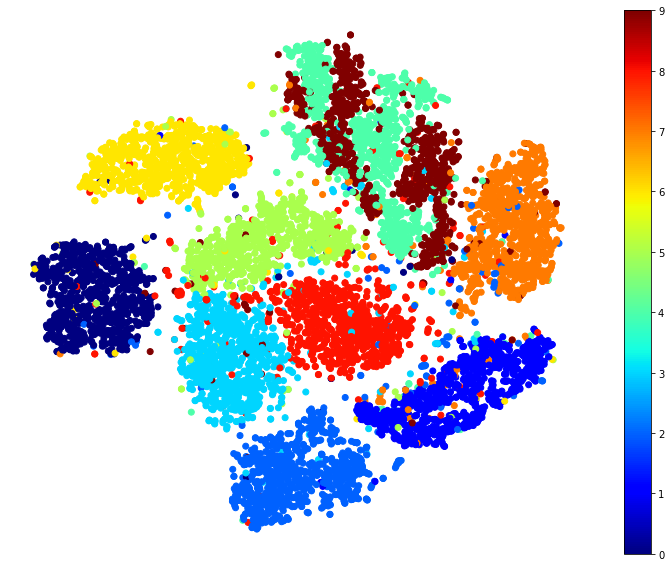

In [59]:
# use ten different color to represent each target class
plt.figure(figsize=(13,10))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, cmap="jet")
plt.axis('off')
plt.colorbar()
plt.show()



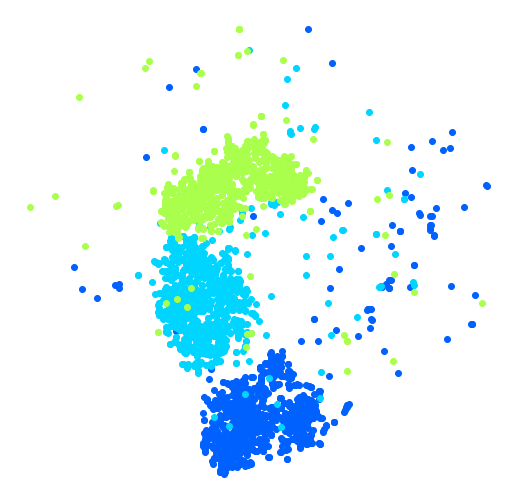

In [64]:
# let's plot 2,3,5
import matplotlib as mpl
plt.figure(figsize=(9,9))
cmap = mpl.cm.get_cmap("jet")
for digit in (2, 3, 5):
    plt.scatter(X_reduced[y == digit, 0], X_reduced[y == digit, 1], c=[cmap(digit / 9)])
plt.axis('off')
plt.show()

In [65]:
# if use tsne to reduce dimension, then plot
idx = (y == 2) | (y == 3) | (y == 5) 
X_subset = X[idx]
y_subset = y[idx]

tsne_subset = TSNE(n_components=2, random_state=42)
X_subset_reduced = tsne_subset.fit_transform(X_subset)


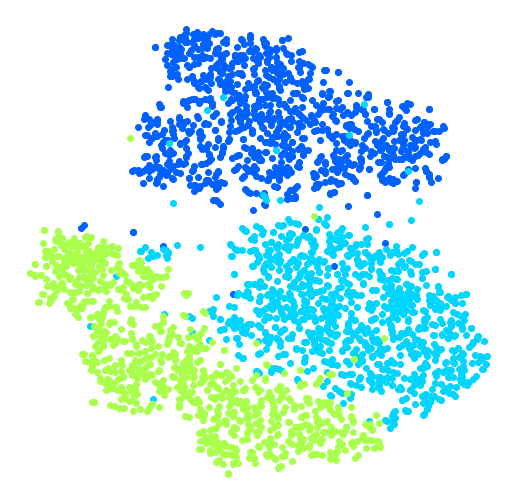

In [72]:
plt.figure(figsize=(9,9))
cmap = mpl.cm.get_cmap("jet")
for digit in (2, 3, 5):
    plt.scatter(X_subset_reduced[y_subset == digit, 0], X_subset_reduced[y_subset == digit, 1], c=[cmap(digit / 9)])
plt.axis('off')
plt.show()
#it has less over lap now

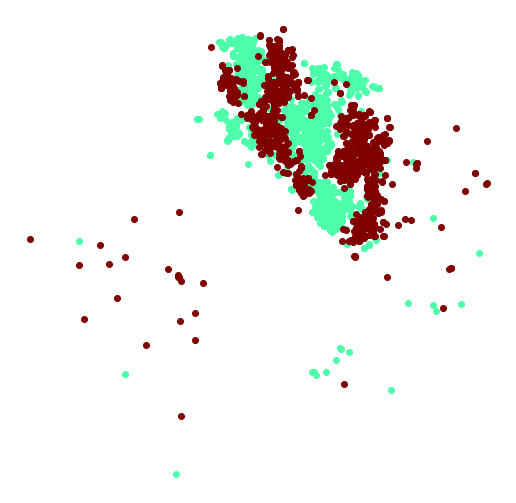

In [73]:
#let's try 4 and 9
plt.figure(figsize=(9,9))
cmap = mpl.cm.get_cmap("jet")
for digit in (4,9):
    plt.scatter(X_reduced[y == digit, 0], X_reduced[y == digit, 1], c=[cmap(digit / 9)])
plt.axis('off')
plt.show()

In [74]:
idx = (y == 4) | (y == 9)
X_subset = X[idx]
y_subset = y[idx]

tsne_subset = TSNE(n_components=2, random_state=42)
X_subset_reduced = tsne_subset.fit_transform(X_subset)


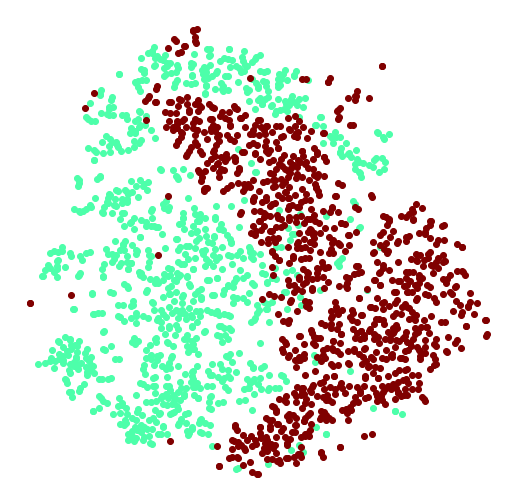

In [75]:
plt.figure(figsize=(9,9))
cmap = mpl.cm.get_cmap("jet")
for digit in (4, 9):
    plt.scatter(X_subset_reduced[y_subset == digit, 0], X_subset_reduced[y_subset == digit, 1], c=[cmap(digit / 9)])
plt.axis('off')
plt.show()
# reduce dimensionality really help visualization
# reduce individualy in sybset also help

In [80]:
# try us other dimensionality reduced algorithm
# plot_digits
from sklearn.preprocessing import MinMaxScaler
from matplotlib.offsetbox import AnnotationBbox, OffsetImage

def plot_digits(X, y, min_distance=0.05, images=None, figsize=(13, 10)):
    # Let's scale the input features so that they range from 0 to 1
    X_normalized = MinMaxScaler().fit_transform(X)
    # Now we create the list of coordinates of the digits plotted so far.
    # We pretend that one is already plotted far away at the start, to
    # avoid `if` statements in the loop below
    neighbors = np.array([[10., 10.]])
    # The rest should be self-explanatory
    plt.figure(figsize=figsize)
    cmap = mpl.cm.get_cmap("jet")
    digits = np.unique(y)
    for digit in digits:
        plt.scatter(X_normalized[y == digit, 0], X_normalized[y == digit, 1], c=[cmap(digit / 9)])
    plt.axis("off")
    ax = plt.gcf().gca()  # get current axes in current figure
    for index, image_coord in enumerate(X_normalized):
        closest_distance = np.linalg.norm(neighbors - image_coord, axis=1).min()
        if closest_distance > min_distance:
            neighbors = np.r_[neighbors, [image_coord]]
            if images is None:
                plt.text(image_coord[0], image_coord[1], str(int(y[index])),
                         color=cmap(y[index] / 9), fontdict={"weight": "bold", "size": 16})
            else:
                image = images[index].reshape(28, 28)
                imagebox = AnnotationBbox(OffsetImage(image, cmap="binary"), image_coord)
                ax.add_artist(imagebox)



In [81]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2, random_state=42)
pca_reduced=pca.fit_transform(X)

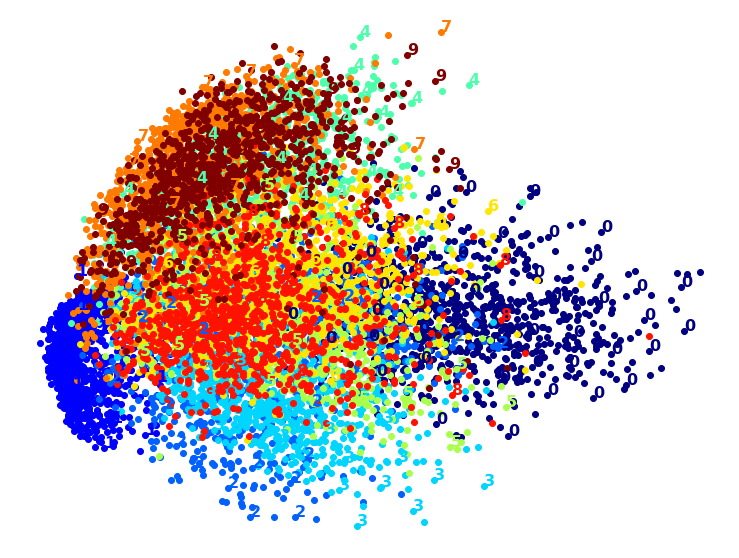

In [82]:
plot_digits(pca_reduced, y)
# pca visulization

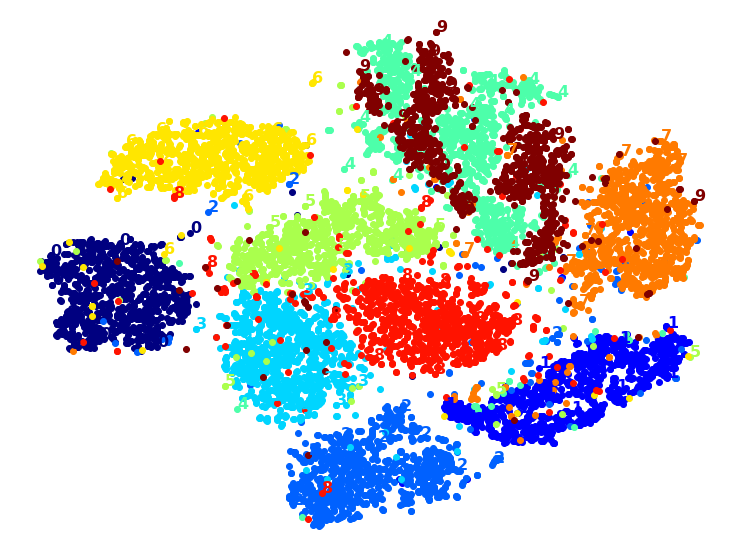

In [83]:
plot_digits(X_reduced, y)
# tsne visualization

In [86]:
from sklearn.manifold import LocallyLinearEmbedding
# try lle this time
lle = LocallyLinearEmbedding(n_components=2, random_state=42)
lle_reduced = lle.fit_transform(X)

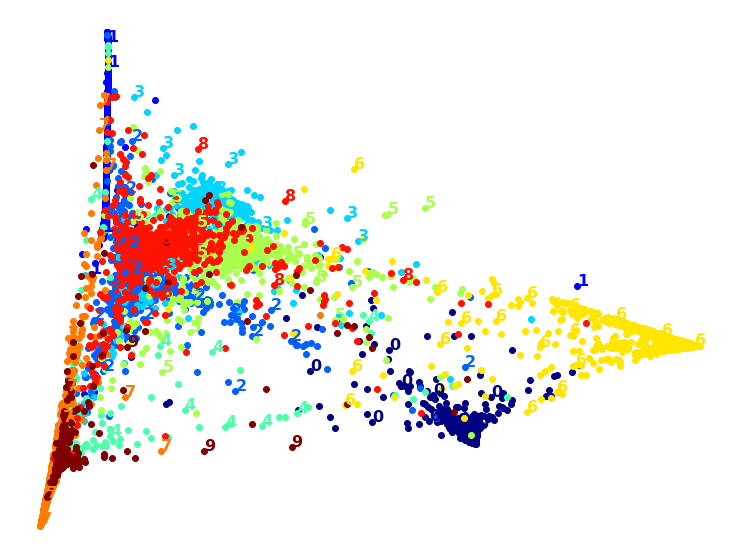

In [87]:
plot_digits(lle_reduced, y)
# lle visualization


In [ ]:
from sklearn.manifold import MDS
m=2000
mds_reduced = MDS(n_components=2, random_state=42).fit_transform(X[:m])
# now that's try mds
# processing 10000 is gonna take too much time

In [ ]:
# that's plot mds 
plot_digits(mds_reduced, y)

In [ ]:
# we can also use pipeline to combine different dimension reduction methods